In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/listings (1).csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,116268,Double Room (Unavailable for check in 31Dec-1Jan),586671,Joe,NaN,Enfield,51.611370,-0.118880,Private room,40.0,7.0,38.0,2024-01-01,0.28,1.0,105.0,1.0,NaN
1,117203,A stylish Victorian home in West London,255103,Olga,NaN,Hammersmith and Fulham,51.501550,-0.233002,Entire home/apt,131.0,5.0,91.0,2024-06-09,0.59,1.0,33.0,10.0,NaN
2,127652,Contemporary central London apt,134938,Ron,NaN,Camden,51.559528,-0.144319,Entire home/apt,215.0,5.0,216.0,2024-07-09,1.35,1.0,134.0,5.0,NaN
3,127860,Double bedroom in cottage Twickenham (sleeps 1-2),161720,Andy,NaN,Richmond upon Thames,51.447770,-0.339620,Private room,NaN,2.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN
4,131444,Apartment close to centre.,646165,Yevgeniy,NaN,Lambeth,51.491476,-0.111514,Entire home/apt,150.0,30.0,148.0,2024-06-15,0.93,2.0,6.0,12.0,NaN


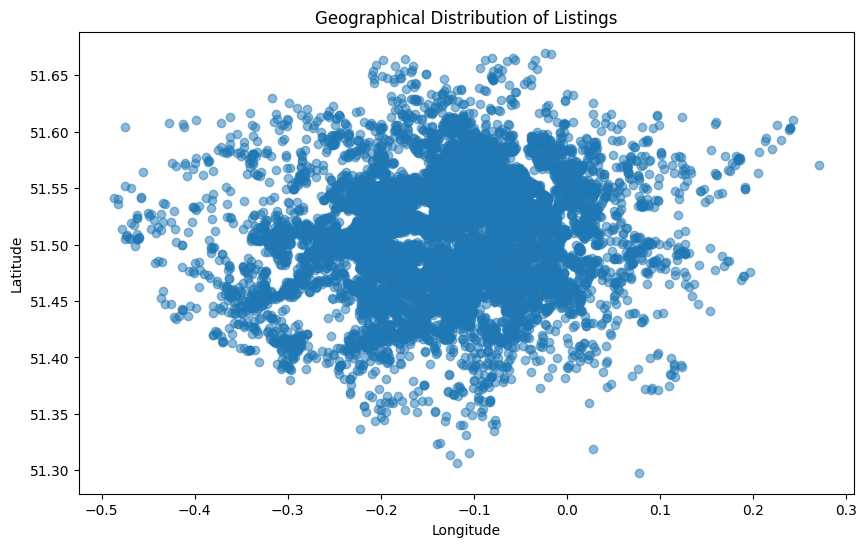

In [ ]:
# @title Geographical Distribution of Listings

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
_ = plt.title('Geographical Distribution of Listings')

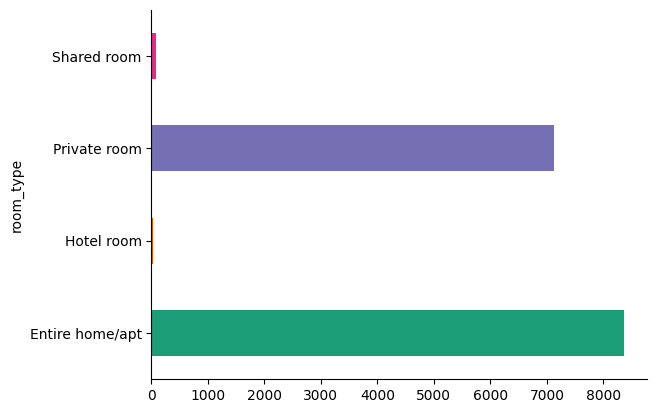

In [ ]:
# @title room_type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('room_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
df=df.drop(columns=['neighbourhood_group','license'])

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.558500e+04,1.558500e+04,15584.000000,15584.000000,5646.000000,15584.000000,15584.000000,11904.00000,15584.000000,15584.000000,15584.000000
mean,9.907196e+06,3.260927e+07,51.510744,-0.126433,172.250089,6.046971,40.782084,0.53592,4.659009,69.413309,4.147523
std,5.376958e+06,3.304991e+07,0.046920,0.089294,824.607509,28.742542,79.225620,0.83693,24.217349,117.483300,11.132716
min,1.391300e+04,4.775000e+03,51.297899,-0.486540,15.000000,1.000000,0.000000,0.01000,1.000000,0.000000,0.000000
25%,5.732247e+06,7.141708e+06,51.480708,-0.187995,60.000000,1.000000,1.000000,0.05000,1.000000,0.000000,0.000000
50%,9.913528e+06,2.239749e+07,51.515682,-0.118730,109.000000,2.000000,8.000000,0.21000,1.000000,0.000000,0.000000
75%,1.426174e+07,4.755814e+07,51.542693,-0.068582,187.000000,4.000000,44.000000,0.66000,2.000000,90.000000,2.000000
max,1.873379e+07,4.630784e+08,51.669900,0.270380,53588.000000,1124.000000,1134.000000,8.84000,404.000000,365.000000,162.000000


In [ ]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64
minimum_nights,float64


In [ ]:
# Identify columns with datetime data type
numeric_features = df.select_dtypes(include=['int64','float64']).columns
print("Columns:", numeric_features)

Columns: Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')


# Checking outliers

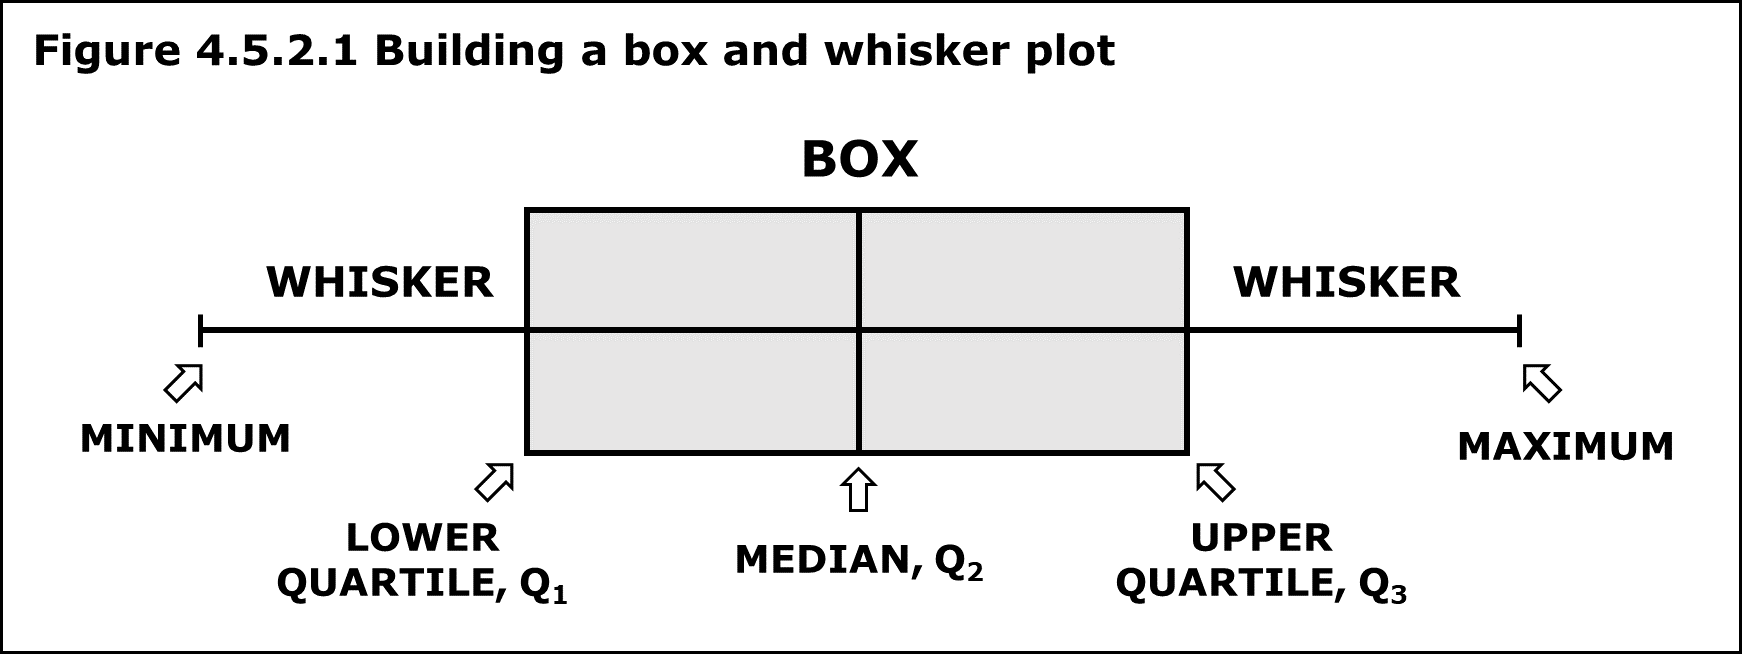

The points outside whiskers are treated as outliers

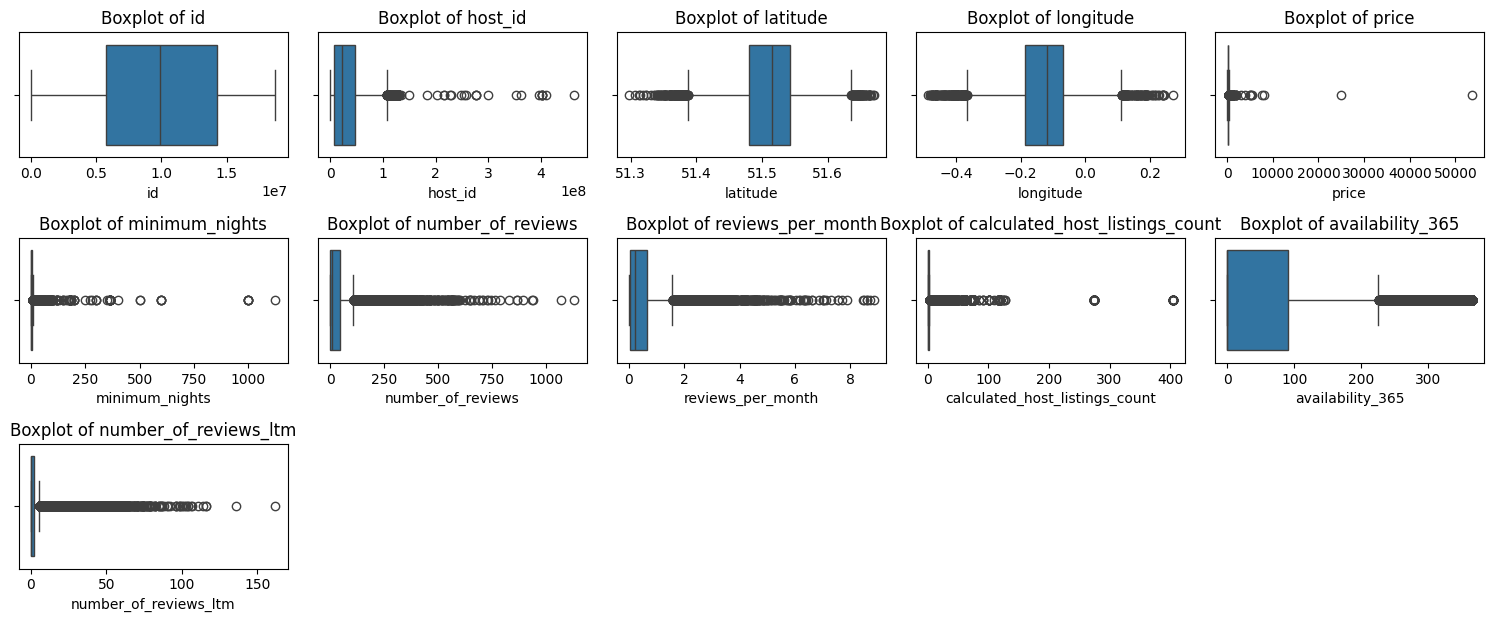

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the IQR for each feature
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
outlier_condition = (df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))

# Count the number of outliers per feature
outliers_iqr = outlier_condition.sum()
print("Number of outliers per feature based on IQR:", outliers_iqr)


Number of outliers per feature based on IQR: id                                   0
host_id                            609
latitude                           196
longitude                          242
price                              334
minimum_nights                    1231
number_of_reviews                 1740
reviews_per_month                 1042
calculated_host_listings_count    1762
availability_365                  2481
number_of_reviews_ltm             2808
dtype: int64


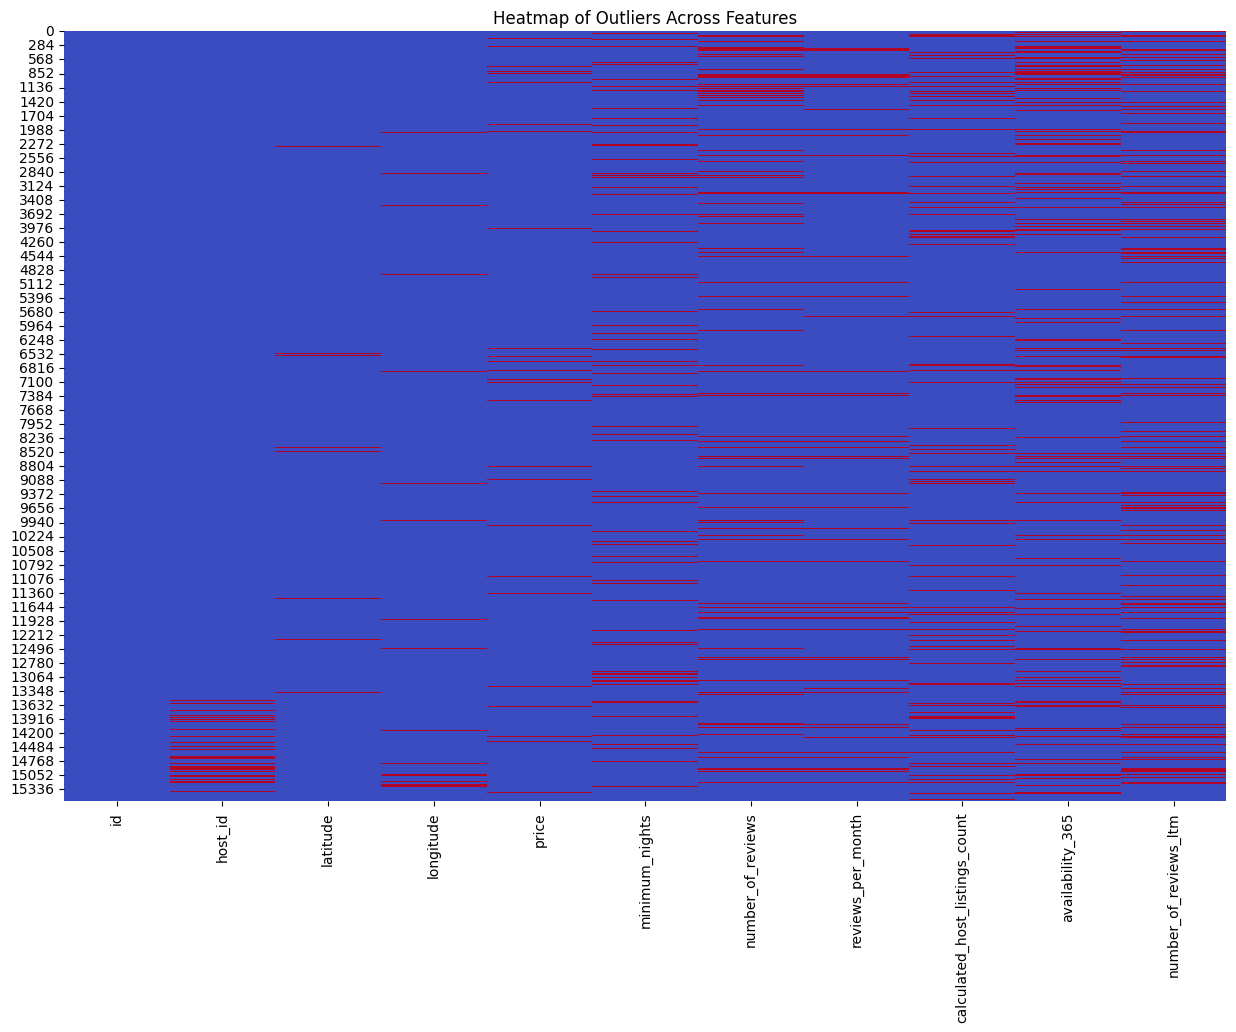

In [ ]:
# Create a heatmap to visualize where the outliers are in the dataset
plt.figure(figsize=(15, 10))
sns.heatmap(outlier_condition, cmap="coolwarm", cbar=False)
plt.title("Heatmap of Outliers Across Features")
plt.show()


The number of red lines means the outliers present in a coloumn.

Now as there are large numbers of outliers. Therefore, we can either remove or transform since there are not small number of outliers to remove so we gonna use log transformation.

# Log Transformation
Log transformation can help with skewed data and is particularly useful when you have data with a heavy right tail (large positive outliers).

id                                -0.157737
host_id                            2.032027
latitude                          -0.316262
longitude                         -0.238455
price                             53.494194
minimum_nights                    22.832218
number_of_reviews                  3.929007
reviews_per_month                  3.355691
calculated_host_listings_count    12.313521
availability_365                   1.494438
number_of_reviews_ltm              4.380142
dtype: float64


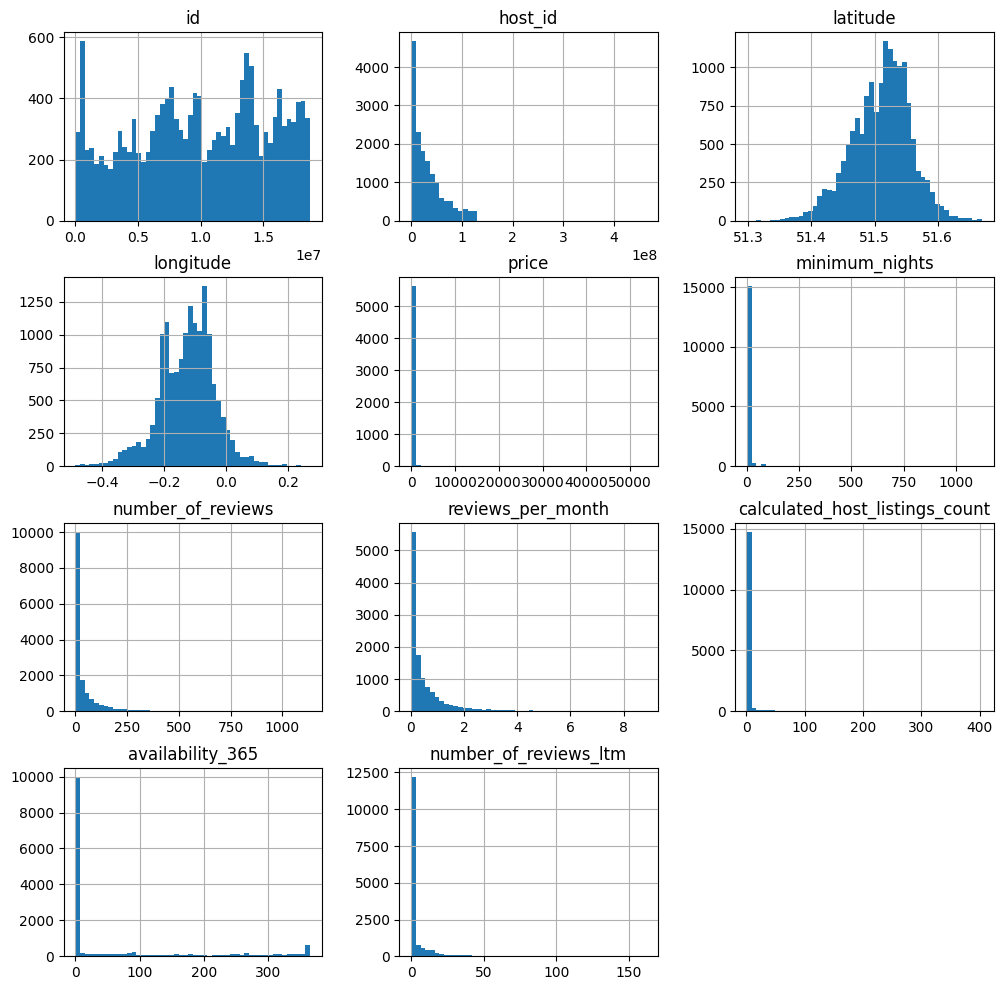

In [ ]:
# Check skewness of all numeric columns
skewness = df[numeric_features].skew()
print(skewness)

# You can visualize the distribution to identify skewed features
import matplotlib.pyplot as plt
df[numeric_features].hist(figsize=(12, 12), bins=50)
plt.show()


In [ ]:
# Apply log transformation (adding a small constant to avoid log(0))
import numpy as np

# List of features to log-transform
log_features = ['price', 'number_of_reviews', 'number_of_reviews_ltm', 'availability_365']

# Apply log transformation
df[log_features] = df[log_features].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)

# Verify the transformation
print(df[log_features].head())


      price  number_of_reviews  number_of_reviews_ltm  availability_365
0  3.713572           3.663562               0.693147          4.663439
1  4.882802           4.521789               2.397895          3.526361
2  5.375278           5.379897               1.791759          4.905275
3       NaN           0.000000               0.000000          0.000000
4  5.017280           5.003946               2.564949          1.945910


We choose only these columns log_features = ['price', 'number_of_reviews', 'number_of_reviews_ltm', 'availability_365'] due to its probability distrbution or skewness which is more positive or right skewed.

In [ ]:
print(df.head())  # Check the scaled data


       id                                               name  host_id  \
0  116268  Double Room (Unavailable for check in 31Dec-1Jan)   586671   
1  117203            A stylish Victorian home in West London   255103   
2  127652                    Contemporary central London apt   134938   
3  127860  Double bedroom in cottage Twickenham (sleeps 1-2)   161720   
4  131444                         Apartment close to centre.   646165   

  host_name           neighbourhood   latitude  longitude        room_type  \
0       Joe                 Enfield  51.611370  -0.118880     Private room   
1      Olga  Hammersmith and Fulham  51.501550  -0.233002  Entire home/apt   
2       Ron                  Camden  51.559528  -0.144319  Entire home/apt   
3      Andy    Richmond upon Thames  51.447770  -0.339620     Private room   
4  Yevgeniy                 Lambeth  51.491476  -0.111514  Entire home/apt   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0  3.713572

# Encoding

In [ ]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64
minimum_nights,float64


In [ ]:
# Identify columns with datetime data type
cat_features = df.select_dtypes(include=['object']).columns
print("Columns:", cat_features)

Columns: Index(['name', 'host_name', 'neighbourhood', 'room_type', 'last_review'], dtype='object')


In [ ]:
import pandas as pd

# Columns to be encoded
cat_columns = ['name', 'host_name', 'neighbourhood', 'room_type', 'last_review']

# Apply One-Hot Encoding
data_encoded = pd.get_dummies(df,columns=cat_columns, drop_first=True)  # drop_first avoids multicollinearity

# Verify the encoding
print(data_encoded.head())


       id  host_id   latitude  longitude     price  minimum_nights  \
0  116268   586671  51.611370  -0.118880  3.713572             7.0   
1  117203   255103  51.501550  -0.233002  4.882802             5.0   
2  127652   134938  51.559528  -0.144319  5.375278             5.0   
3  127860   161720  51.447770  -0.339620       NaN             2.0   
4  131444   646165  51.491476  -0.111514  5.017280            30.0   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0           3.663562               0.28                             1.0   
1           4.521789               0.59                             1.0   
2           5.379897               1.35                             1.0   
3           0.000000                NaN                             1.0   
4           5.003946               0.93                             2.0   

   availability_365  ...  last_review_2024-08-30  last_review_2024-08-31  \
0          4.663439  ...                   False    

In [ ]:
# Frequency encoding for 'neighbourhood' (if there are too many categories)
neighbourhood_freq = df['neighbourhood'].value_counts().to_dict()
df['neighbourhood_freq'] = df['neighbourhood'].map(neighbourhood_freq)

# Check the new encoded column
print(df[['neighbourhood', 'neighbourhood_freq']].head())


            neighbourhood  neighbourhood_freq
0                 Enfield                  98
1  Hammersmith and Fulham                 749
2                  Camden                1033
3    Richmond upon Thames                 312
4                 Lambeth                1018


# Feature Engineering

Creating new features

In [ ]:
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'neighbourhood_freq'],
      dtype='object')

In [ ]:
#Knowing how recent the last review was can give insight into the listing's activity and how often guests stay there.
df['days_since_last_review'] = (pd.to_datetime('today') - pd.to_datetime(df['last_review'])).dt.days


In [ ]:
#Avalability ratio= This feature will capture the proportion of time the listing is available out of the entire year, giving a sense of its availability.


df['availability_ratio'] = df['availability_365'] / 365


In [ ]:
#You already have reviews_per_month, but you can adjust it by the availability (for example, listings with high availability may naturally have more reviews).
df['adjusted_reviews_per_month'] = df['reviews_per_month'] * df['availability_ratio']


In [ ]:
#The price may not always reflect the true cost for a single night due to minimum night requirements. This can help understand the normalized price for each stay.
df['price_per_night'] = df['price'] / df['minimum_nights']

In [ ]:
df['host_activity_level'] = df['calculated_host_listings_count']


# Dimensionality Reduction

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_freq,days_since_last_review,availability_ratio,adjusted_reviews_per_month,price_per_night,host_activity_level
0,116268,Double Room (Unavailable for check in 31Dec-1Jan),586671,Joe,Enfield,51.611370,-0.118880,Private room,3.713572,7.0,...,0.28,1.0,4.663439,0.693147,98,320.0,0.012777,0.003577,0.530510,1.0
1,117203,A stylish Victorian home in West London,255103,Olga,Hammersmith and Fulham,51.501550,-0.233002,Entire home/apt,4.882802,5.0,...,0.59,1.0,3.526361,2.397895,749,160.0,0.009661,0.005700,0.976560,1.0
2,127652,Contemporary central London apt,134938,Ron,Camden,51.559528,-0.144319,Entire home/apt,5.375278,5.0,...,1.35,1.0,4.905275,1.791759,1033,130.0,0.013439,0.018143,1.075056,1.0
3,127860,Double bedroom in cottage Twickenham (sleeps 1-2),161720,Andy,Richmond upon Thames,51.447770,-0.339620,Private room,NaN,2.0,...,NaN,1.0,0.000000,0.000000,312,NaN,0.000000,NaN,NaN,1.0
4,131444,Apartment close to centre.,646165,Yevgeniy,Lambeth,51.491476,-0.111514,Entire home/apt,5.017280,30.0,...,0.93,2.0,1.945910,2.564949,1018,154.0,0.005331,0.004958,0.167243,2.0


In [ ]:
df[numeric_features].isnull().sum()

,0
id,0
host_id,0
latitude,1
longitude,1
price,9939
minimum_nights,1
number_of_reviews,1
reviews_per_month,3681
calculated_host_listings_count,1
availability_365,1


In [ ]:
df['price'].unique()

array([ 3.71357207,  4.88280192,  5.37527841,         nan,  5.01727984,
        4.98360662,  5.19849703,  5.38907173,  3.63758616,  4.24849524,
        4.02535169,  4.55387689,  7.17088848,  4.2341065 ,  5.52545294,
        5.3981627 ,  4.56434819,  4.51085951,  4.04305127,  3.8286414 ,
        3.04452244,  3.8918203 ,  4.18965474,  6.29894925,  4.46590812,
        5.04985601,  3.93182563,  5.35185813,  5.18178355,  4.60517019,
        4.29045944,  5.08140436,  4.09434456,  4.79579055,  6.20253552,
        5.25227343,  4.94875989,  4.70048037,  5.50533154,  4.41884061,
        5.66988092,  4.11087386,  4.87519732,  3.78418963,  4.47733681,
        4.4543473 ,  4.49980967,  5.30330491,  3.98898405,  4.26267988,
        4.52178858,  3.95124372,  4.7095302 ,  5.14166356,  5.7365723 ,
        5.08759634,  4.83628191,  3.87120101,  4.33073334,  4.9698133 ,
        4.97673374,  5.170484  ,  5.0369526 ,  5.86078622,  3.8501476 ,
        5.4161004 ,  4.06044301,  5.21493576,  4.73619845,  3.73

In [ ]:
df['price'] = df['price'].fillna(df['price'].median())


In [ ]:
df['price'].isnull().sum()

0

In [ ]:
df['reviews_per_month'].unique()

array([0.28, 0.59, 1.35,  nan, 0.93, 1.55, 0.46, 0.7 , 0.06, 0.73, 0.04,
       0.01, 1.17, 0.62, 1.57, 1.05, 0.85, 1.42, 1.89, 0.3 , 0.11, 0.08,
       0.31, 1.74, 1.44, 0.34, 0.13, 0.37, 0.26, 1.8 , 0.4 , 1.38, 0.81,
       0.54, 2.09, 0.86, 0.5 , 3.71, 0.22, 0.18, 0.03, 1.94, 3.81, 0.91,
       0.1 , 1.2 , 0.78, 0.56, 0.05, 0.65, 4.06, 0.29, 0.99, 0.17, 0.44,
       3.48, 0.6 , 1.32, 2.7 , 1.  , 1.21, 2.  , 1.01, 1.03, 0.09, 0.96,
       0.8 , 0.89, 0.51, 1.16, 0.07, 0.2 , 1.51, 1.27, 0.52, 0.02, 2.63,
       1.23, 3.45, 1.24, 0.38, 1.86, 0.25, 1.29, 0.15, 0.75, 0.24, 2.41,
       0.61, 4.52, 0.48, 1.41, 0.83, 0.45, 1.07, 0.19, 2.44, 0.97, 0.16,
       2.29, 3.8 , 0.36, 0.53, 3.33, 3.61, 0.55, 0.68, 3.01, 0.41, 0.82,
       0.64, 1.54, 0.63, 0.35, 0.98, 1.1 , 0.66, 0.84, 0.39, 2.85, 2.74,
       2.05, 1.33, 1.68, 0.9 , 1.12, 2.13, 2.22, 0.49, 0.94, 0.32, 1.14,
       2.04, 0.69, 1.78, 1.11, 0.43, 0.23, 0.79, 2.58, 1.96, 1.6 , 1.59,
       1.15, 1.25, 2.21, 1.71, 0.27, 2.4 , 1.72, 0.

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

In [ ]:
df['reviews_per_month'].isnull().sum()

0

In [ ]:
df.shape

(15585, 22)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_freq,days_since_last_review,availability_ratio,adjusted_reviews_per_month,price_per_night,host_activity_level
0,116268,Double Room (Unavailable for check in 31Dec-1Jan),586671,Joe,Enfield,51.611370,-0.118880,Private room,3.713572,7.0,...,0.28,1.0,4.663439,0.693147,98,320.0,0.012777,0.003577,0.530510,1.0
1,117203,A stylish Victorian home in West London,255103,Olga,Hammersmith and Fulham,51.501550,-0.233002,Entire home/apt,4.882802,5.0,...,0.59,1.0,3.526361,2.397895,749,160.0,0.009661,0.005700,0.976560,1.0
2,127652,Contemporary central London apt,134938,Ron,Camden,51.559528,-0.144319,Entire home/apt,5.375278,5.0,...,1.35,1.0,4.905275,1.791759,1033,130.0,0.013439,0.018143,1.075056,1.0
3,127860,Double bedroom in cottage Twickenham (sleeps 1-2),161720,Andy,Richmond upon Thames,51.447770,-0.339620,Private room,4.700480,2.0,...,0.21,1.0,0.000000,0.000000,312,NaN,0.000000,NaN,NaN,1.0
4,131444,Apartment close to centre.,646165,Yevgeniy,Lambeth,51.491476,-0.111514,Entire home/apt,5.017280,30.0,...,0.93,2.0,1.945910,2.564949,1018,154.0,0.005331,0.004958,0.167243,2.0


In [ ]:
# from sklearn.decomposition import PCA

# # Apply PCA to reduce the number of features (example: reduce to 10 features)
# pca = PCA(n_components=10)
# data_reduced = pca.fit_transform(df[numeric_features])


In [ ]:
# data_reduced.shape

In [ ]:
# data_reduced

# Visualizations

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric columns
numeric_df = X.select_dtypes(include=['float64', 'int64'])

# If there are missing values, you can impute them or drop rows/columns
numeric_df = numeric_df.fillna(numeric_df.mean())  # Imputing missing values with the column mean

# Now calculate the VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = numeric_df.columns
vif['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

# Display the VIF results
print(vif)


                           Feature           VIF
0                            const  1.281251e+06
1                               id  1.410716e+00
2                          host_id  1.408692e+00
3                         latitude  1.062641e+00
4                        longitude  1.086967e+00
5                            price  1.114148e+00
6                   minimum_nights  1.040067e+00
7                number_of_reviews  3.422721e+00
8                reviews_per_month  9.914620e+00
9   calculated_host_listings_count           inf
10                availability_365           inf
11           number_of_reviews_ltm  3.905439e+00
12              neighbourhood_freq  1.176478e+00
13          days_since_last_review  2.258510e+00
14              availability_ratio           inf
15      adjusted_reviews_per_month  8.471671e+00
16                 price_per_night  1.098120e+00
17             host_activity_level           inf


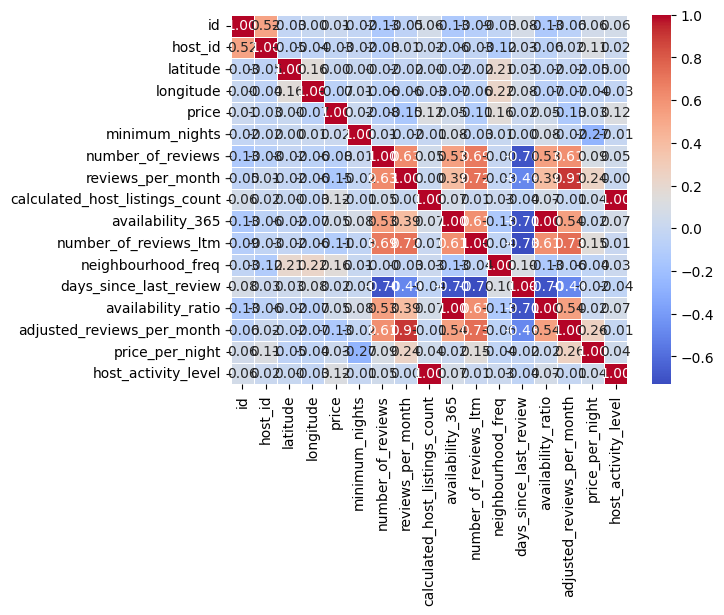

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number', 'float', 'int'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.show()


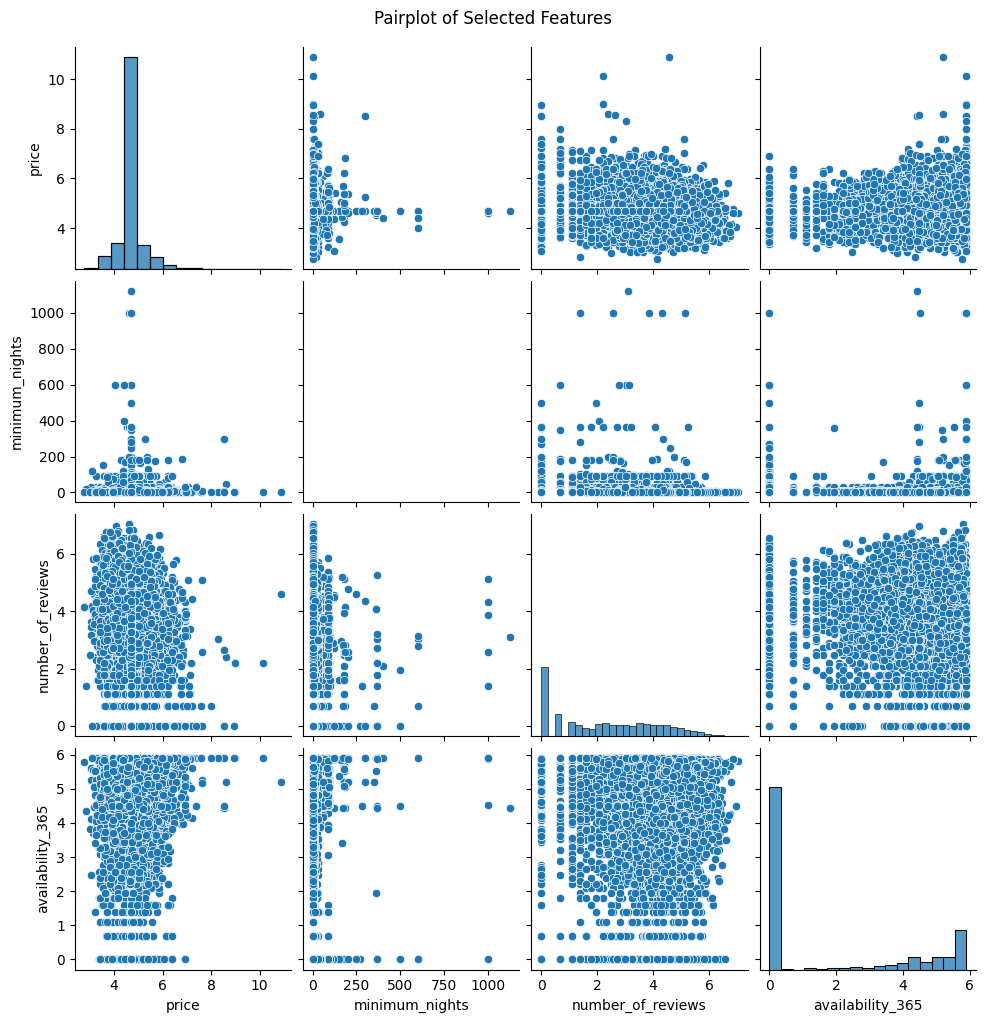

In [ ]:
sns.pairplot(df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


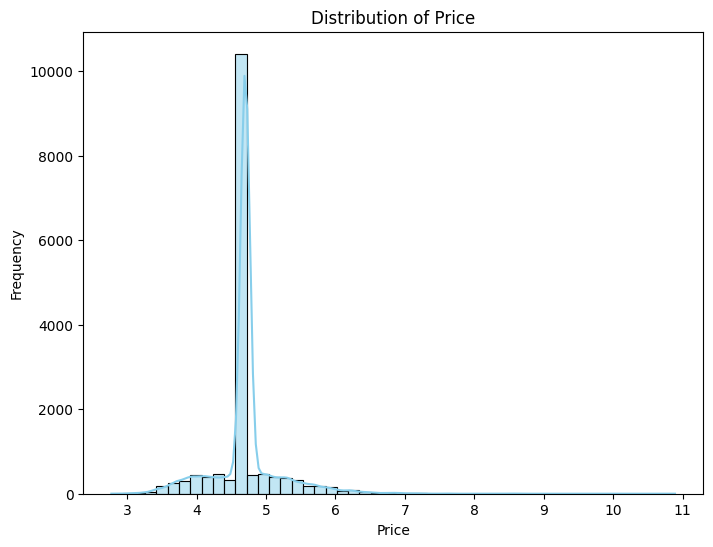

In [ ]:
# Distribution of 'price'
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, color='skyblue', bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


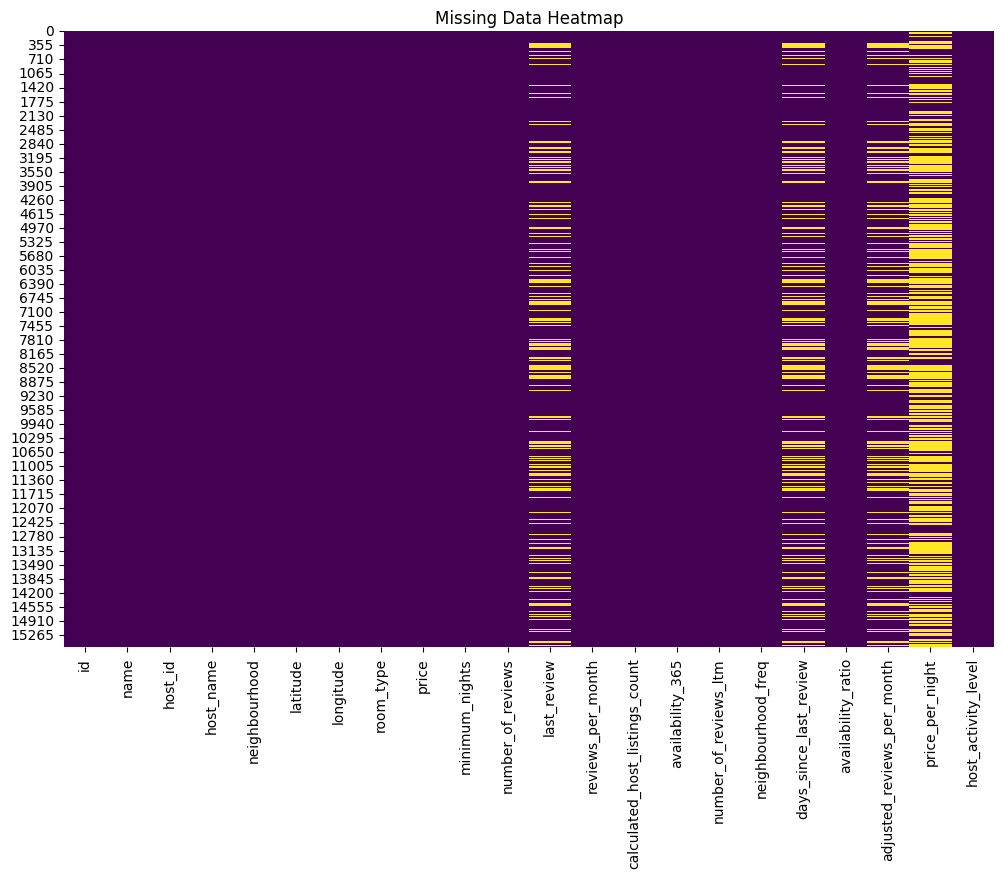

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


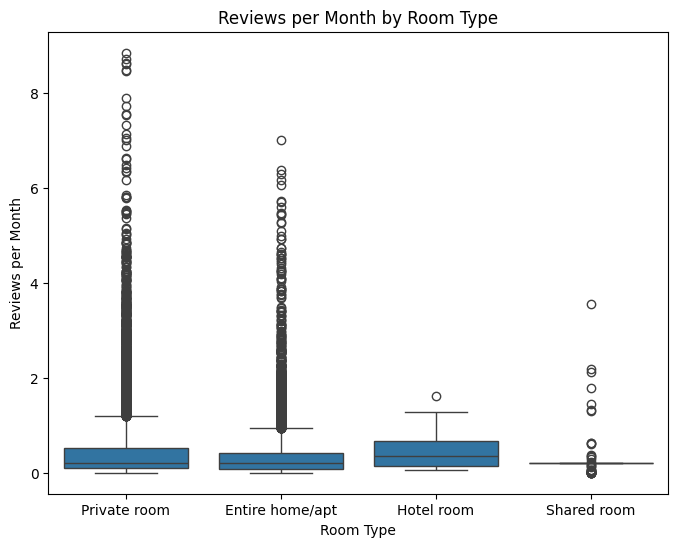

In [ ]:
# Boxplot for reviews per month by room type
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='reviews_per_month', data=df)
plt.title('Reviews per Month by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Reviews per Month')
plt.show()


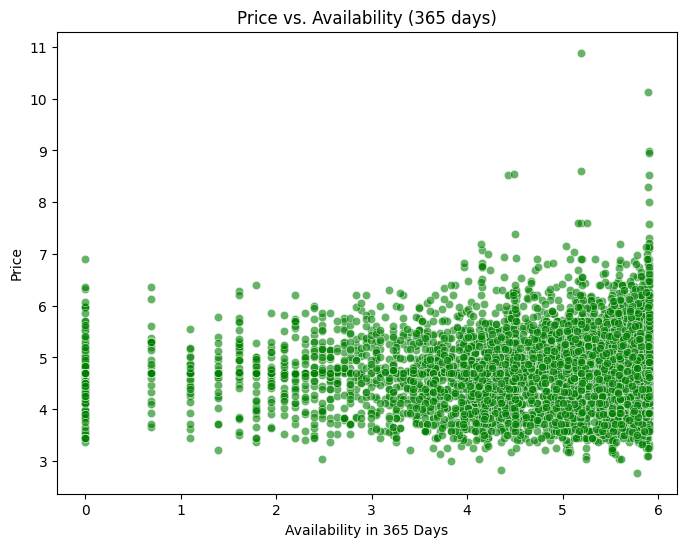

In [ ]:
# Scatter plot of 'price' vs 'availability_365'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.6, color='green')
plt.title('Price vs. Availability (365 days)')
plt.xlabel('Availability in 365 Days')
plt.ylabel('Price')
plt.show()


# Advanced Analysis

## Neighbourhood Analysis

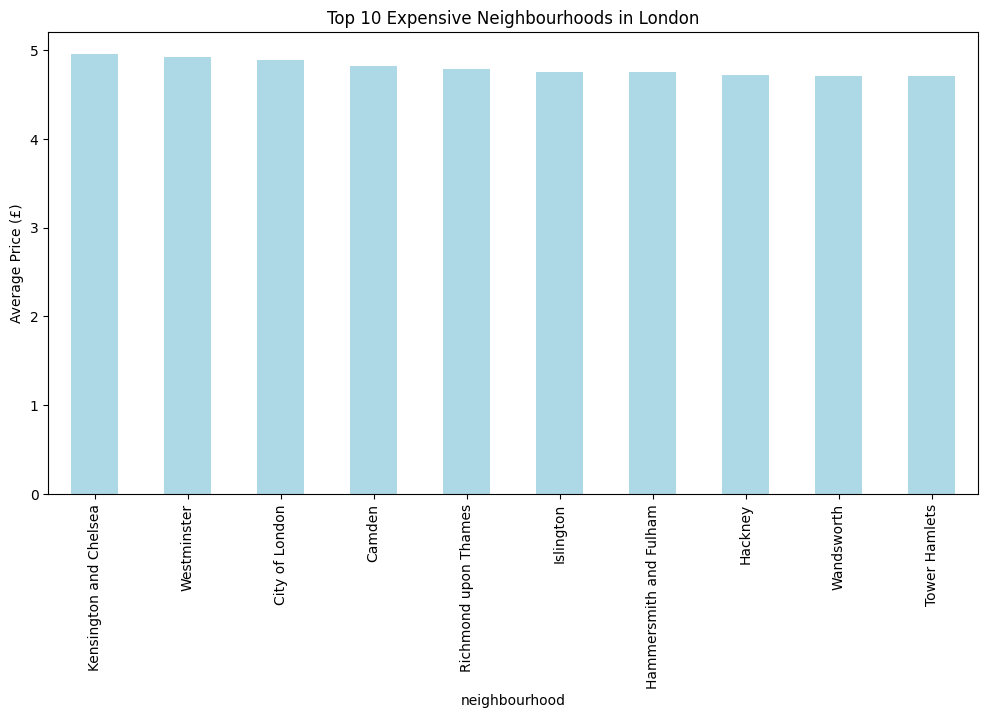

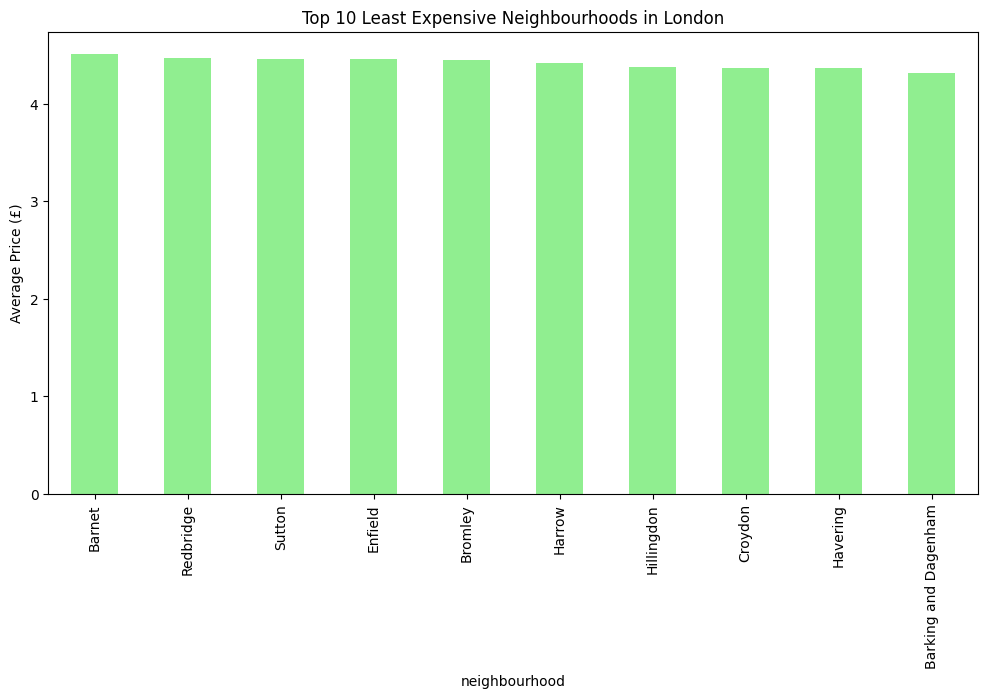

In [ ]:
# Calculate average price per neighbourhood
avg_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Visualize the top 10 expensive neighbourhoods
plt.figure(figsize=(12, 6))
avg_price_by_neighbourhood.head(10).plot(kind='bar', color='lightblue')
plt.title("Top 10 Expensive Neighbourhoods in London")
plt.ylabel("Average Price (£)")
plt.show()

# Visualize the least expensive neighbourhoods
plt.figure(figsize=(12, 6))
avg_price_by_neighbourhood.tail(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Least Expensive Neighbourhoods in London")
plt.ylabel("Average Price (£)")
plt.show()


## Time Series Analysis

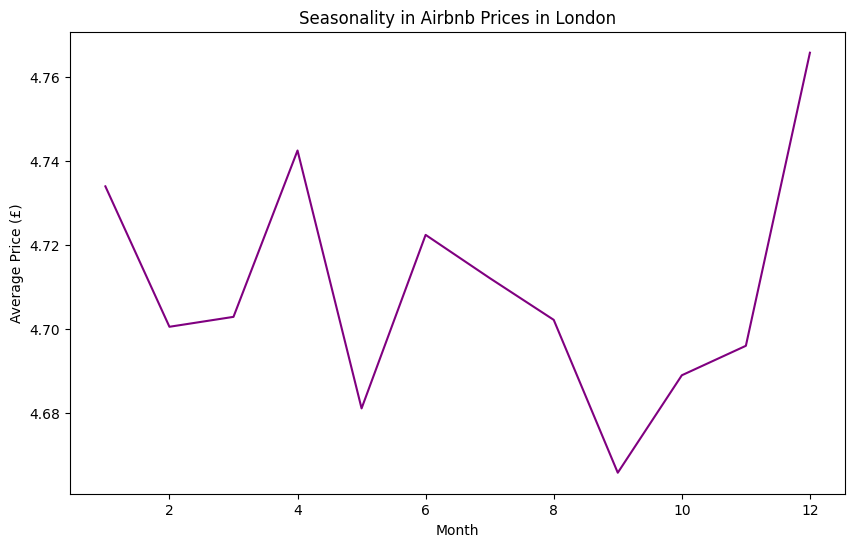

In [ ]:
#Seasonality in Prices: Identify seasonal trends using monthly or yearly average prices.


# Resample by month and calculate mean price
df['month'] = df['last_review'].dt.month
monthly_avg_price = df.groupby('month')['price'].mean()

# Plot seasonality
plt.figure(figsize=(10, 6))
monthly_avg_price.plot(kind='line', color='purple')
plt.title("Seasonality in Airbnb Prices in London")
plt.ylabel("Average Price (£)")
plt.xlabel("Month")
plt.show()


## Geospatial Analysis
Heatmap of Listings: Visualize listing density by geographical location using latitude and longitude.

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a map centered in London
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=12)

# Create a heatmap based on listing locations
heat_data = [[row['latitude'], row['longitude']] for index, row in df.dropna(subset=['latitude', 'longitude']).iterrows()]
HeatMap(heat_data).add_to(london_map)

# Display map
london_map


## Proximity to Landmarks

In [ ]:
import numpy as np
import pandas as pd

# Function to calculate distance between two latitude-longitude points using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c  # Distance in kilometers
    return distance

# Coordinates for landmarks (Tower of London and Buckingham Palace)
tower_of_london_coords = (51.5081, -0.0759)
buckingham_palace_coords = (51.5014, -0.1419)

# Adding a new column for distance to each landmark
df['distance_to_tower_of_london'] = df.apply(
    lambda row: haversine(row['latitude'], row['longitude'], tower_of_london_coords[0], tower_of_london_coords[1]),
    axis=1
)

df['distance_to_buckingham_palace'] = df.apply(
    lambda row: haversine(row['latitude'], row['longitude'], buckingham_palace_coords[0], buckingham_palace_coords[1]),
    axis=1
)

# Check the first few rows to see the added columns
print(df[['distance_to_tower_of_london', 'distance_to_buckingham_palace']].head())


   distance_to_tower_of_london  distance_to_buckingham_palace
0                    11.861263                      12.331236
1                    10.897901                       6.305956
2                     7.422845                       6.465752
3                    19.456700                      14.936020
4                     3.081259                       2.375396


Correlation: Let's calculate the correlation between distance to the landmarks and the price of the listings.

In [ ]:
# Correlation between distance to landmarks and price
corr_tower = df['distance_to_tower_of_london'].corr(df['price'])
corr_buckingham = df['distance_to_buckingham_palace'].corr(df['price'])

print(f"Correlation between distance to Tower of London and price: {corr_tower}")
print(f"Correlation between distance to Buckingham Palace and price: {corr_buckingham}")


Correlation between distance to Tower of London and price: -0.14166645805040293
Correlation between distance to Buckingham Palace and price: -0.2504378233871525


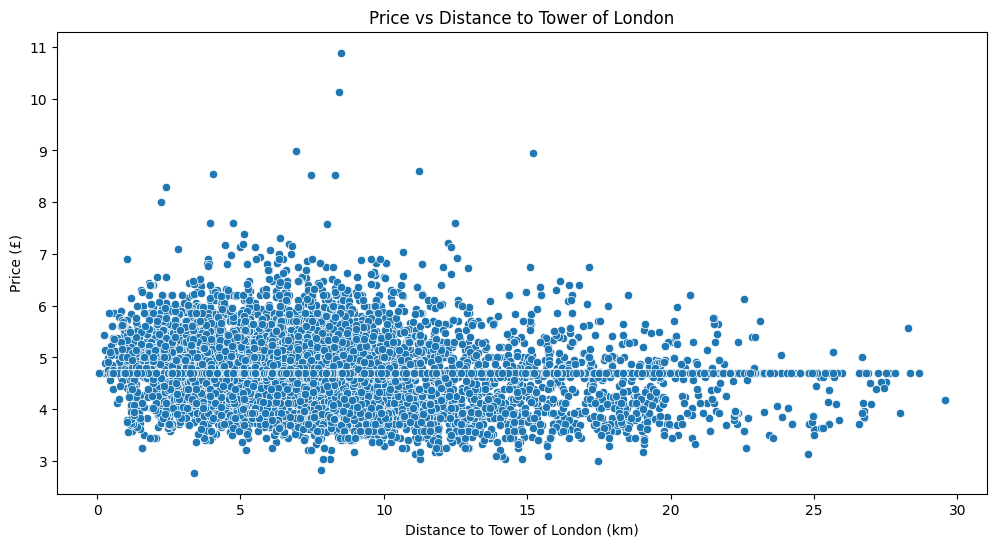

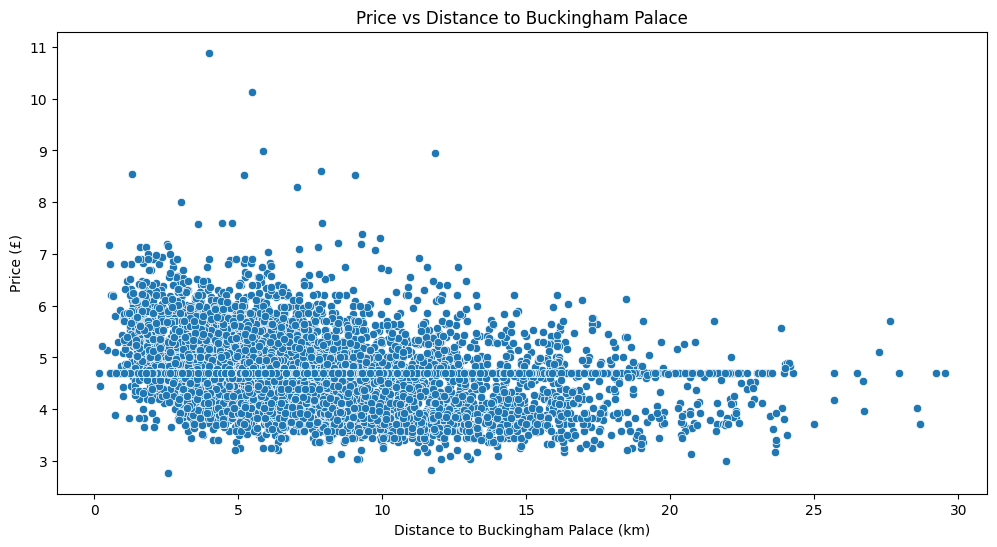

In [ ]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the price vs distance to landmarks
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='distance_to_tower_of_london', y='price')
plt.title("Price vs Distance to Tower of London")
plt.xlabel("Distance to Tower of London (km)")
plt.ylabel("Price (£)")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='distance_to_buckingham_palace', y='price')
plt.title("Price vs Distance to Buckingham Palace")
plt.xlabel("Distance to Buckingham Palace (km)")
plt.ylabel("Price (£)")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating bins for distance to the Tower of London (e.g., 0-1 km, 1-5 km, 5-10 km, etc.)
bins = [0, 1, 5, 10, 20, 50, 100, 200, 500]  # distance in kilometers
labels = ['0-1 km', '1-5 km', '5-10 km', '10-20 km', '20-50 km', '50-100 km', '100-200 km', '200+ km']

# Creating a new column for distance bins based on distance to Tower of London
df['distance_to_tower_of_london_bin'] = pd.cut(df['distance_to_tower_of_london'], bins=bins, labels=labels)

# # Box Plot: Price distribution by distance to Tower of London
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='distance_to_tower_of_london_bin', y='price', data=df)
# plt.title("Price Distribution by Distance to Tower of London", fontsize=16)
# plt.xlabel("Distance to Tower of London (km)", fontsize=12)
# plt.ylabel("Price (£)", fontsize=12)
# plt.xticks(rotation=45)
# plt.show()

# Box Plot: Price distribution by distance to Buckingham Palace
df['distance_to_buckingham_palace_bin'] = pd.cut(df['distance_to_buckingham_palace'], bins=bins, labels=labels)

# plt.figure(figsize=(12, 6))
# sns.boxplot(x='distance_to_buckingham_palace_bin', y='price', data=df)
# plt.title("Price Distribution by Distance to Buckingham Palace", fontsize=16)
# plt.xlabel("Distance to Buckingham Palace (km)", fontsize=12)
# plt.ylabel("Price (£)", fontsize=12)
# plt.xticks(rotation=45)
# plt.show()


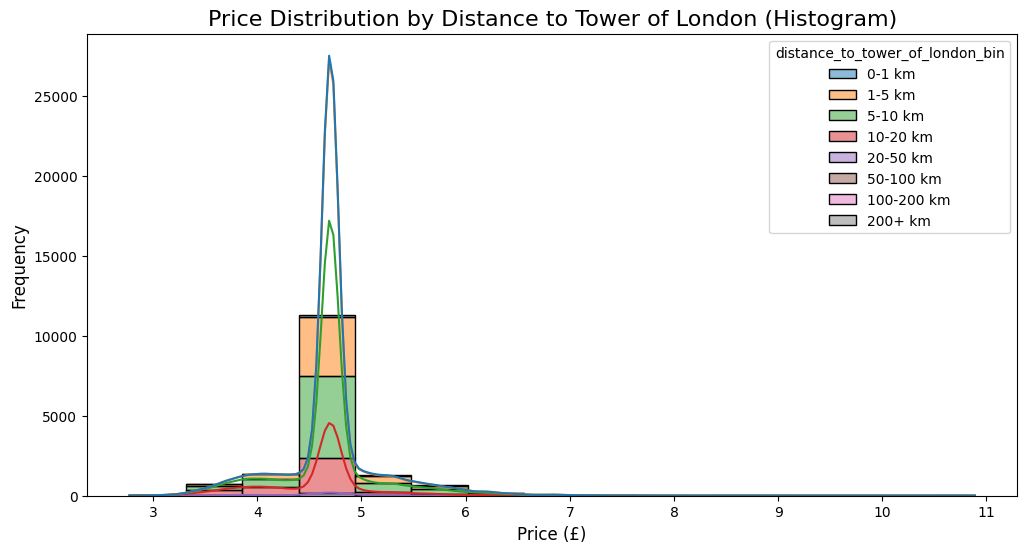

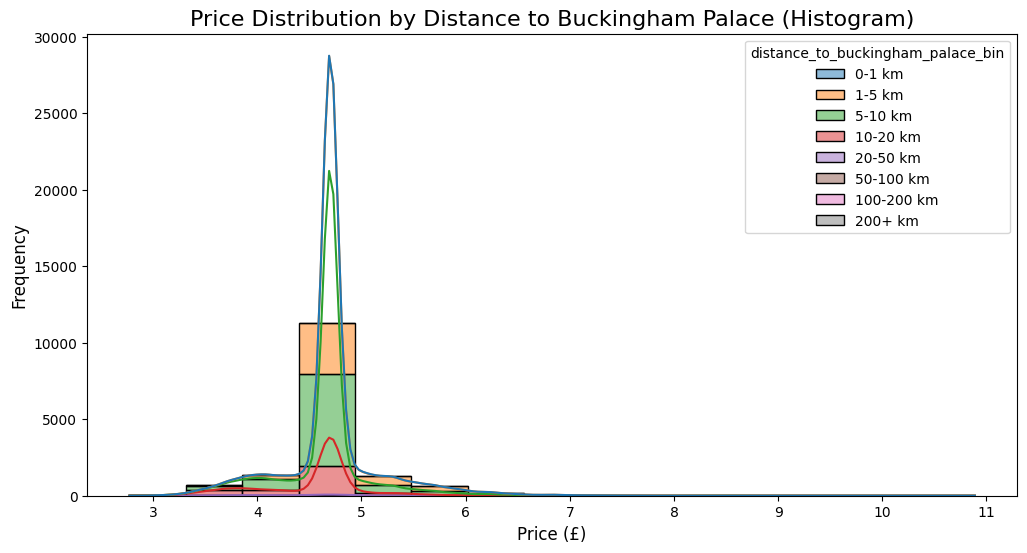

In [ ]:
# Histogram: Price distribution by distance to Tower of London
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price', hue='distance_to_tower_of_london_bin', multiple='stack', kde=True)
plt.title("Price Distribution by Distance to Tower of London (Histogram)", fontsize=16)
plt.xlabel("Price (£)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Histogram: Price distribution by distance to Buckingham Palace
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price', hue='distance_to_buckingham_palace_bin', multiple='stack', kde=True)
plt.title("Price Distribution by Distance to Buckingham Palace (Histogram)", fontsize=16)
plt.xlabel("Price (£)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


## Landmark -Big ben

In [ ]:
# Impute missing values with the mean latitude and longitude
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

# Now apply the distance calculation
df['distance_to_big_ben'] = df.apply(calculate_distance_to_big_ben, axis=1)

# Check the first few rows to confirm
print(df[['latitude', 'longitude', 'distance_to_big_ben']].head())


    latitude  longitude  distance_to_big_ben
0  51.611370  -0.118880            12.319412
1  51.501550  -0.233002             7.527914
2  51.559528  -0.144319             6.686674
3  51.447770  -0.339620            16.058253
4  51.491476  -0.111514             1.370794


In [ ]:
from geopy.distance import geodesic
import numpy as np

# Coordinates of Big Ben (in decimal degrees)
big_ben_coords = (51.5007, -0.1246)

# Calculate distance to Big Ben for each listing
def calculate_distance_to_big_ben(row):
    listing_coords = (row['latitude'], row['longitude'])
    return geodesic(listing_coords, big_ben_coords).km

# Add the new column for distance to Big Ben
df['distance_to_big_ben'] = df.apply(calculate_distance_to_big_ben, axis=1)

# Check the first few rows to confirm
print(df[['latitude', 'longitude', 'distance_to_big_ben']].head())


    latitude  longitude  distance_to_big_ben
0  51.611370  -0.118880            12.319412
1  51.501550  -0.233002             7.527914
2  51.559528  -0.144319             6.686674
3  51.447770  -0.339620            16.058253
4  51.491476  -0.111514             1.370794


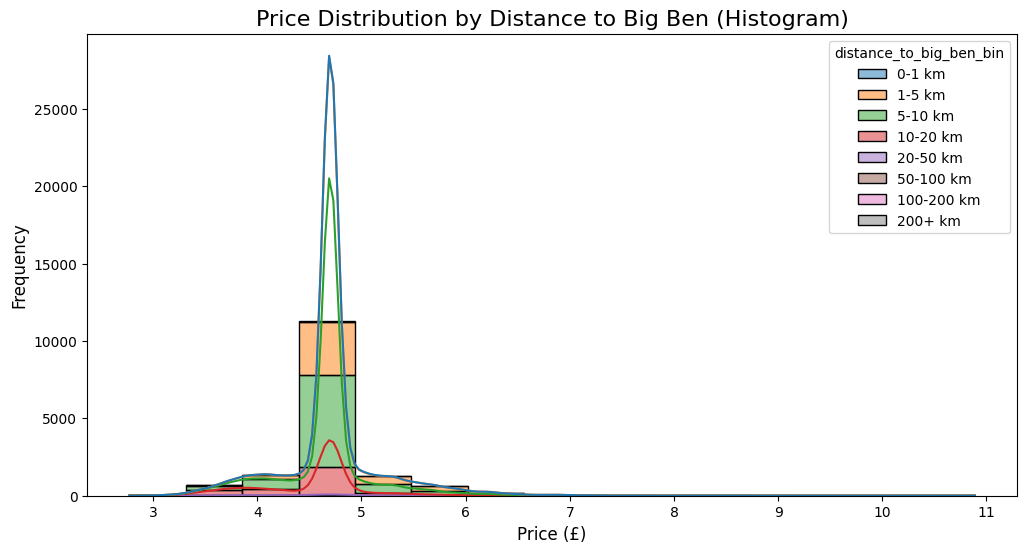

In [ ]:
# Histogram: Price distribution by distance to Big Ben
# Creating bins for distance to Big Ben (e.g., 0-1 km, 1-5 km, 5-10 km, etc.)
bins = [0, 1, 5, 10, 20, 50, 100, 200, 500]  # distance in kilometers
labels = ['0-1 km', '1-5 km', '5-10 km', '10-20 km', '20-50 km', '50-100 km', '100-200 km', '200+ km']

# Create a new column for distance bins based on distance to Big Ben
df['distance_to_big_ben_bin'] = pd.cut(df['distance_to_big_ben'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price', hue='distance_to_big_ben_bin', multiple='stack', kde=True)
plt.title("Price Distribution by Distance to Big Ben (Histogram)", fontsize=16)
plt.xlabel("Price (£)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


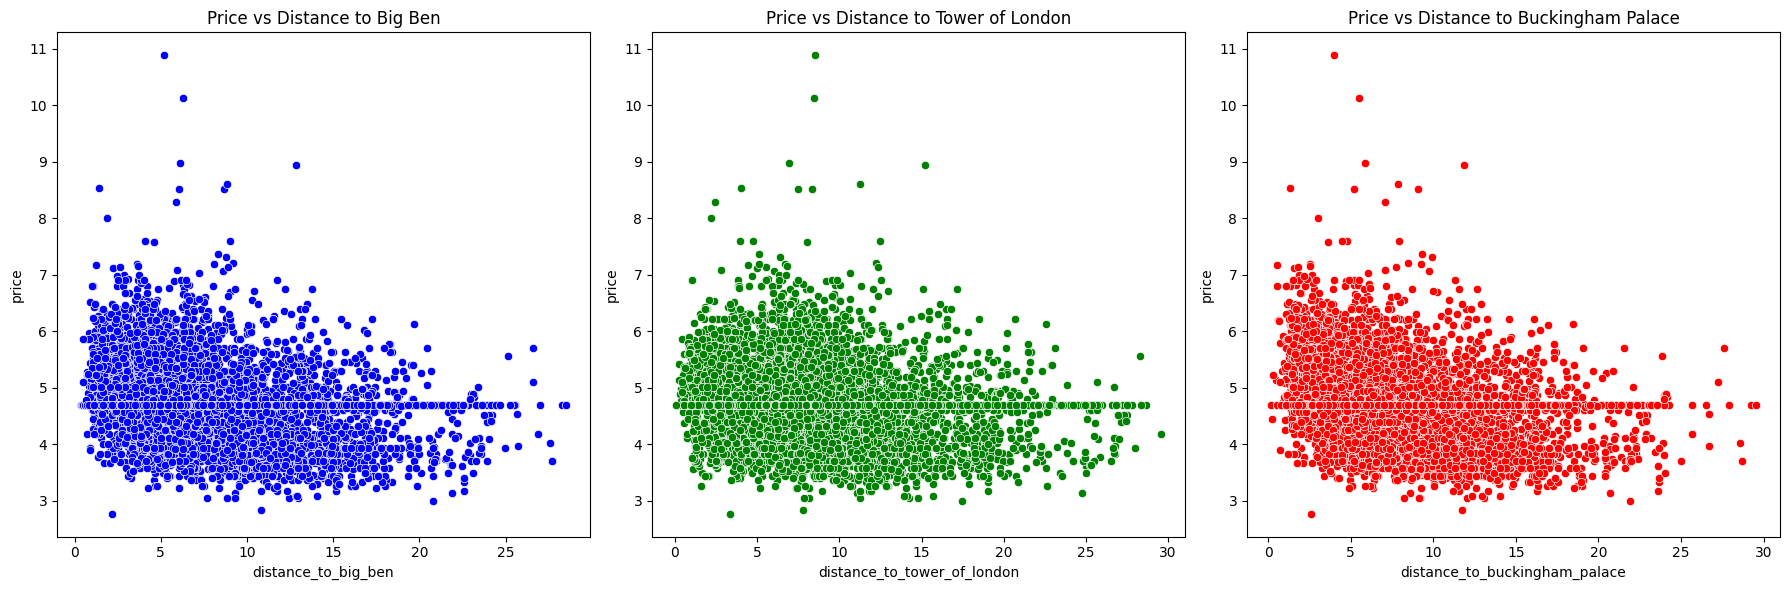

In [ ]:
# Scatter plot of price vs distance to each landmark
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x='distance_to_big_ben', y='price', data=df, ax=axes[0], color='blue')
axes[0].set_title('Price vs Distance to Big Ben')

sns.scatterplot(x='distance_to_tower_of_london', y='price', data=df, ax=axes[1], color='green')
axes[1].set_title('Price vs Distance to Tower of London')

sns.scatterplot(x='distance_to_buckingham_palace', y='price', data=df, ax=axes[2], color='red')
axes[2].set_title('Price vs Distance to Buckingham Palace')

plt.tight_layout()
plt.show()


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# First, let's categorize proximity to landmarks into bins for easier comparison
bins = [0, 500, 1000, 1500, 2000, 2500, float('inf')]  # Distance in meters
labels = ['<500m', '500m-1km', '1km-1.5km', '1.5km-2km', '2km-2.5km', '>2.5km']

# Create columns for distance categories for each landmark
df['distance_to_big_ben_cat'] = pd.cut(df['distance_to_big_ben'], bins=bins, labels=labels)
df['distance_to_tower_of_london_cat'] = pd.cut(df['distance_to_tower_of_london'], bins=bins, labels=labels)
df['distance_to_buckingham_palace_cat'] = pd.cut(df['distance_to_buckingham_palace'], bins=bins, labels=labels)


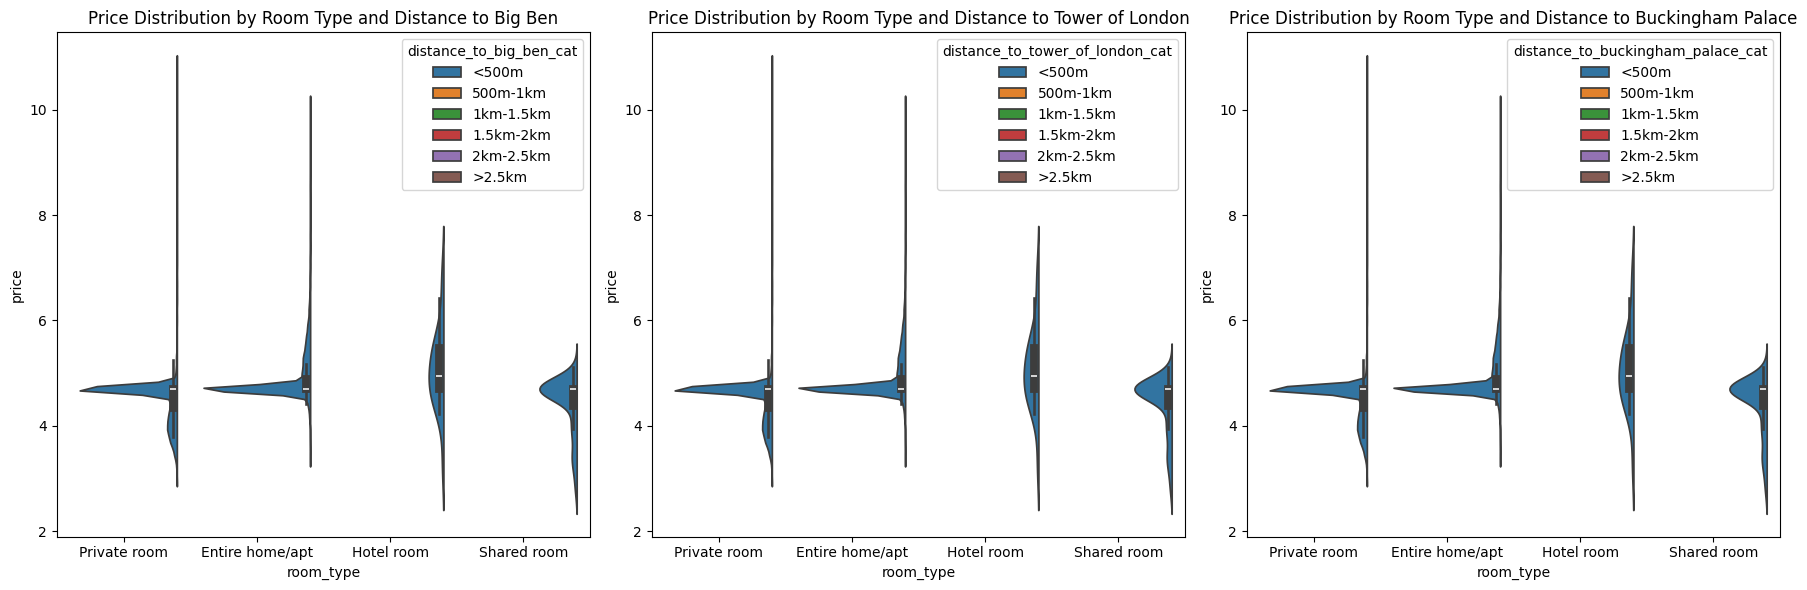

In [ ]:
# Violin plot for price by room type, segmented by distance to landmarks
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.violinplot(x='room_type', y='price', hue='distance_to_big_ben_cat', data=df, split=True, ax=axes[0])
axes[0].set_title('Price Distribution by Room Type and Distance to Big Ben')

sns.violinplot(x='room_type', y='price', hue='distance_to_tower_of_london_cat', data=df, split=True, ax=axes[1])
axes[1].set_title('Price Distribution by Room Type and Distance to Tower of London')

sns.violinplot(x='room_type', y='price', hue='distance_to_buckingham_palace_cat', data=df, split=True, ax=axes[2])
axes[2].set_title('Price Distribution by Room Type and Distance to Buckingham Palace')

plt.tight_layout()
plt.show()


How to read voilin plots?
The width of the violins shows the density of prices at each distance and room type.
